In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

Dataset (Training & Test)

In [75]:
X_train = torch.FloatTensor([[1,2,1], # |X_train| = (m,3)
                             [1,3,2], # |y_train| = (m,)
                             [1,3,4],
                             [1,5,5],
                             [1,7,5],
                             [1,2,5],
                             [1,6,6],
                             [1,7,7]
                             ])
y_train = torch.LongTensor([2,2,2,1,1,1,0,0])

In [76]:
X_test = torch.FloatTensor([[2,1,1],[3,1,2],[3,3,4]]) # | X_test| = (m', 3)
y_test = torch.LongTensor([2,2,2]) # |y_test| = (m',)

Model

In [77]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,3)
  def forward(self,x):
    return self.linear(x)

model = SoftmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr = 0.1)

Training

In [78]:
def train(model, optimizer, x_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):
    prediction = model(X_train)
    cost = F.cross_entropy(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs,cost.item()
    ))

Test(Validation)

In [79]:
def test(model, optimizer, X_test, y_test):
  prediction = model(X_test) #|X_test|=(m',3)에서 |prediction|=(m',3)
  predicted_classes = prediction.max(1)[1]
  correct_count = (predicted_classes == y_test).sum().item()
  cost = F.cross_entropy(prediction,y_test)

  print('Accuracy: {}% Cost: {:.6f}'.format(
      correct_count / len(y_test) * 100, cost.item()
  ))

Run _ Neural Network의 parameter가 optimizer를 통해 찾아지고 있다.

θ by MLE

In [80]:
train(model, optimizer, X_train, y_train)

Epoch    0/20 Cost: 2.203667
Epoch    1/20 Cost: 1.199645
Epoch    2/20 Cost: 1.142985
Epoch    3/20 Cost: 1.117769
Epoch    4/20 Cost: 1.100901
Epoch    5/20 Cost: 1.089523
Epoch    6/20 Cost: 1.079872
Epoch    7/20 Cost: 1.071320
Epoch    8/20 Cost: 1.063325
Epoch    9/20 Cost: 1.055720
Epoch   10/20 Cost: 1.048377
Epoch   11/20 Cost: 1.041245
Epoch   12/20 Cost: 1.034285
Epoch   13/20 Cost: 1.027478
Epoch   14/20 Cost: 1.020813
Epoch   15/20 Cost: 1.014279
Epoch   16/20 Cost: 1.007872
Epoch   17/20 Cost: 1.001586
Epoch   18/20 Cost: 0.995419
Epoch   19/20 Cost: 0.989365


In [81]:
test(model, optimizer, X_test, y_test)

Accuracy: 0.0% Cost: 1.425844


Cost 증가한 이유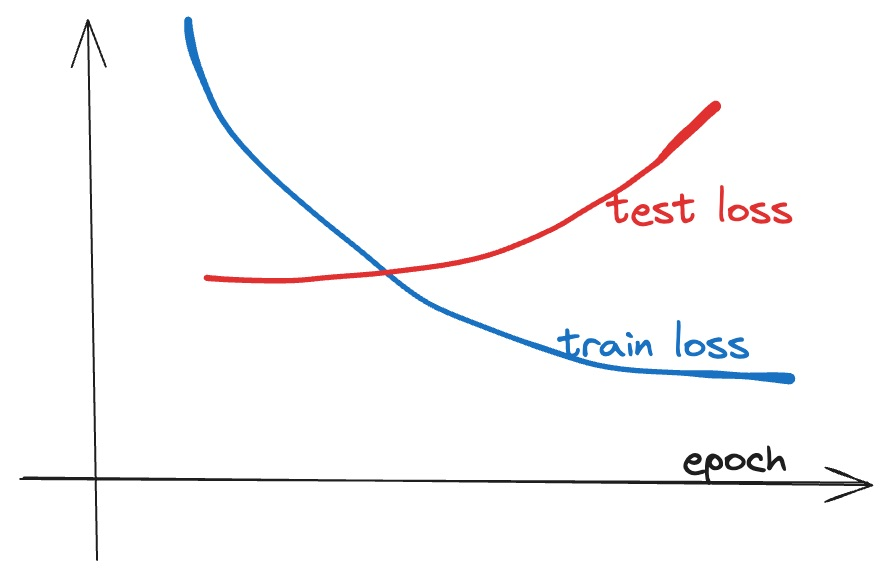

epoch에서 θ를 구했을 때는 이미 overfitting이 된 상태이다.

Learning Rate


*   lr가 너무 크면 diverge하면서 cost가 점점 늘어난다.(overshooting)

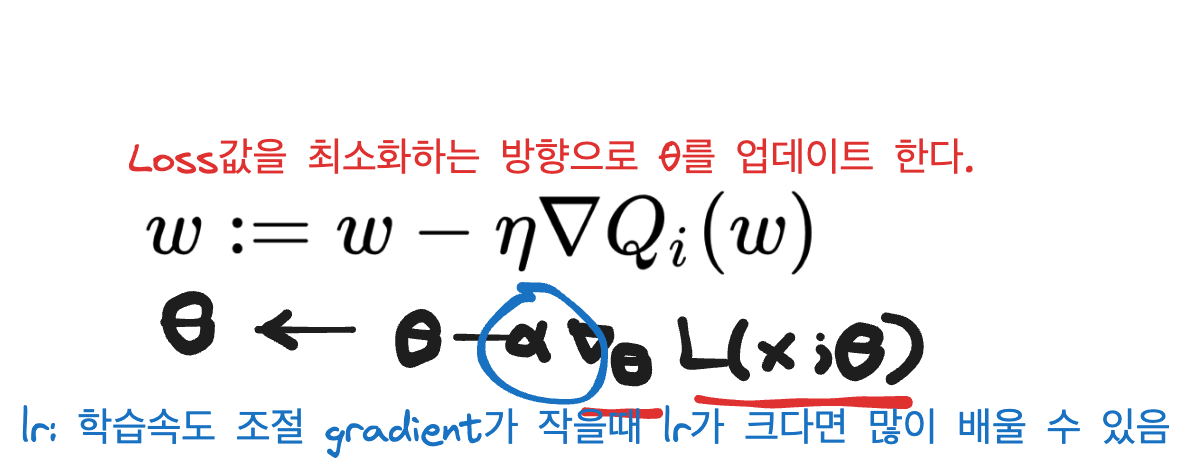



In [82]:
model = SoftmaxClassifierModel()

In [83]:
optimizer = optim.SGD(model.parameters(), lr=1e5)

In [84]:
train(model, optimizer, X_train, y_train)

Epoch    0/20 Cost: 1.280268
Epoch    1/20 Cost: 976950.750000
Epoch    2/20 Cost: 1279135.250000
Epoch    3/20 Cost: 1198378.875000
Epoch    4/20 Cost: 1098825.750000
Epoch    5/20 Cost: 1968197.750000
Epoch    6/20 Cost: 284763.250000
Epoch    7/20 Cost: 1532260.250000
Epoch    8/20 Cost: 1651503.750000
Epoch    9/20 Cost: 521878.593750
Epoch   10/20 Cost: 1397263.250000
Epoch   11/20 Cost: 750986.375000
Epoch   12/20 Cost: 918691.375000
Epoch   13/20 Cost: 1487888.250000
Epoch   14/20 Cost: 1582260.250000
Epoch   15/20 Cost: 685818.125000
Epoch   16/20 Cost: 1140048.875000
Epoch   17/20 Cost: 940566.375000
Epoch   18/20 Cost: 931638.250000
Epoch   19/20 Cost: 1971322.750000




*   lr가 너무 작으면 cost가 거의 줄어들지 않는다.



In [85]:
model = SoftmaxClassifierModel()

In [86]:
optimizer = optim.SGD(model.parameters(), lr=1e-10)

In [87]:
train(model, optimizer, X_train, y_train)

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 3.187324
Epoch    2/20 Cost: 3.187324
Epoch    3/20 Cost: 3.187324
Epoch    4/20 Cost: 3.187324
Epoch    5/20 Cost: 3.187324
Epoch    6/20 Cost: 3.187324
Epoch    7/20 Cost: 3.187324
Epoch    8/20 Cost: 3.187324
Epoch    9/20 Cost: 3.187324
Epoch   10/20 Cost: 3.187324
Epoch   11/20 Cost: 3.187324
Epoch   12/20 Cost: 3.187324
Epoch   13/20 Cost: 3.187324
Epoch   14/20 Cost: 3.187324
Epoch   15/20 Cost: 3.187324
Epoch   16/20 Cost: 3.187324
Epoch   17/20 Cost: 3.187324
Epoch   18/20 Cost: 3.187324
Epoch   19/20 Cost: 3.187324


따라서 발산하면 lr를 작게 조정하고, cost가 줄어들지 않는다면 lr를 크게 조정한다.

In [88]:
model = SoftmaxClassifierModel()
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train(model, optimizer, X_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 1.198802
Epoch    2/20 Cost: 1.150877
Epoch    3/20 Cost: 1.131977
Epoch    4/20 Cost: 1.116242
Epoch    5/20 Cost: 1.102514
Epoch    6/20 Cost: 1.089676
Epoch    7/20 Cost: 1.077479
Epoch    8/20 Cost: 1.065775
Epoch    9/20 Cost: 1.054511
Epoch   10/20 Cost: 1.043655
Epoch   11/20 Cost: 1.033187
Epoch   12/20 Cost: 1.023091
Epoch   13/20 Cost: 1.013356
Epoch   14/20 Cost: 1.003968
Epoch   15/20 Cost: 0.994917
Epoch   16/20 Cost: 0.986189
Epoch   17/20 Cost: 0.977775
Epoch   18/20 Cost: 0.969661
Epoch   19/20 Cost: 0.961836


Data Preprocessing

In [89]:
X_train = torch.FloatTensor([[73,80,75], # |X_train| = (m,3)
                             [93,88,93], # |y_train| = (m,)
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

standardization, 정규분포화
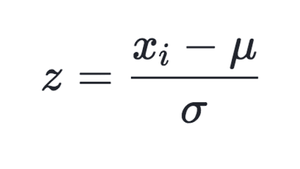

In [90]:
mu = X_train.mean(dim=0)

In [91]:
sigma = X_train.std(dim=0)

In [92]:
norm_X_train = (X_train - mu) / sigma

In [93]:
print(norm_X_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


nn.Module을 상속받아서 Preprocessed Data로 Training

In [94]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1) #3 element받아서 1 element내보냄
  def forward(self,X):
    return self.linear(X)

In [95]:
model = MultivariateLinearRegressionModel()

In [96]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [97]:
def train(model, optimizer, X_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):
    prediction = model(X_train)
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs,cost.item()
    ))

In [98]:
train(model, optimizer, norm_X_train, y_train)

Epoch    0/20 Cost: 29785.089844
Epoch    1/20 Cost: 18906.166016
Epoch    2/20 Cost: 12054.673828
Epoch    3/20 Cost: 7702.029785
Epoch    4/20 Cost: 4925.733398
Epoch    5/20 Cost: 3151.632812
Epoch    6/20 Cost: 2016.996094
Epoch    7/20 Cost: 1291.051270
Epoch    8/20 Cost: 826.505249
Epoch    9/20 Cost: 529.207397
Epoch   10/20 Cost: 338.934174
Epoch   11/20 Cost: 217.153564
Epoch   12/20 Cost: 139.206757
Epoch   13/20 Cost: 89.313782
Epoch   14/20 Cost: 57.375465
Epoch   15/20 Cost: 36.928429
Epoch   16/20 Cost: 23.835773
Epoch   17/20 Cost: 15.450401
Epoch   18/20 Cost: 10.077809
Epoch   19/20 Cost: 6.633700
